1886.4637239778222
-75458.54895911289
503.05699306075263
1131.8782343866933
-45275.12937546773
301.83419583645156
0.25132741228718347


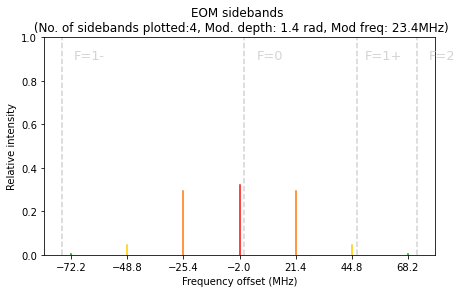

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 16 10:11:33 2023

@author: mcwt12
"""

#trying to get some nice EOM sideband plots

import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import os

def ElectricFieldOut(t, Vm, Vpi, omegam, omega, E0):
    #gives E field out as function of time t
    #carrier freq is omega, amplitude input is E0
    #modulation of form V = Vmsin(omegam*t)
    #Vpi is half wave voltage for the crystal
    m = (np.pi*Vm)/Vpi
    carrier = scipy.special.jv(0, m)*np.cos(omega*t)
    sideband1 = scipy.special.jv(1, m)*( np.cos((omega+omegam)*t) - np.cos((omega-omegam)*t))
    sideband2 = scipy.special.jv(2, m)*( np.cos((omega+2*omegam)*t) + np.cos((omega-2*omegam)*t))
    sideband3 = scipy.special.jv(3, m)*( np.cos((omega+3*omegam)*t) - np.cos((omega-3*omegam)*t))
    sideband4 = scipy.special.jv(4, m)*( np.cos((omega+4*omegam)*t) + np.cos((omega-4*omegam)*t))
    sideband5 = scipy.special.jv(5, m)*( np.cos((omega+5*omegam)*t) - np.cos((omega-5*omegam)*t))
    sideband6 = scipy.special.jv(6, m)*( np.cos((omega+6*omegam)*t) + np.cos((omega-6*omegam)*t))
    sideband7 = scipy.special.jv(7, m)*( np.cos((omega+7*omegam)*t) - np.cos((omega-7*omegam)*t))
    
    return E0*(carrier + sideband1 + sideband2 + sideband3 + sideband4 + sideband5 + sideband6 + sideband7)

def IntensityOut(E):
    return np.abs(E)**2


def PlotEOMsidebandsE(m, Vm, Vpi, omega, omegam):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot()
    n = (np.pi*Vm)/Vpi
    xticks = []
    for i in range(m):
        if i == 0:
            E = scipy.special.jv(i, n)
            x = omega+i*omegam
            ax.axvline(x, ymin=0, ymax=E)
            xticks.append(omega)
        else:
                
            if (i % 2) == 0:
                prefact = 1
            else:
                prefact= -1
            E = scipy.special.jv(i, n)
            
            ax.axvline(omega+i*omegam, ymin=0, ymax=E)
            ax.axvline(omega-i*omegam, ymin=0, ymax=prefact*E)
            xticks.append(omega+i*omegam)
            xticks.append(omega-i*omegam)
    ax.xaxis.set_ticks(xticks)
    ax.set_title(f'EOM sidebands \n (No. of sidebands:{m}, Vm:{Vm}V, Vpi:{Vpi:.3}V, Carrier freq:{omega}, Mod freq:{omegam})')


def PlotEOMsidebands(m, Vm, Vpi, omega, omegam):
    #gives E field out as function of time t
    #carrier freq is omega, amplitude input is E0
    #modulation of form V = Vmsin(omegam*t)
    #Vpi is half wave voltage for the crystal
    #m is the number of sidebands you want to plot
    fig = plt.figure(figsize=(7,4))
    ax = fig.add_subplot()
    n = (np.pi*Vm)/Vpi
    xticks = []
    
    #plotting rough positions of X v=0,N=1 hyperfine states
    F0peak = 0
    ax.axvline(F0peak, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.axvline(F0peak-76, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.axvline(F0peak+47, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.axvline(F0peak+72, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.text(F0peak-71, 0.9, 'F=1-', fontsize=13, color='#D4D4D4')
    ax.text(F0peak+5, 0.9, 'F=0', fontsize=13, color='#D4D4D4')
    ax.text(F0peak+50, 0.9, 'F=1+', fontsize=13, color='#D4D4D4')
    ax.text(F0peak+77, 0.9, 'F=2', fontsize=13, color='#D4D4D4')
    
    
    
    colours = ['#ff0800', '#ff7700', '#ffcc00', '#009900', '#0066cc', '#4b0082', '#330044']
    
    for i in range(m):
        if i == 0:
            E = scipy.special.jv(i, n)
            x = omega+i*omegam
            ax.axvline(x, ymin=0, ymax=np.abs(E)**2, color=colours[0])
            xticks.append(omega)
        else:
            E = scipy.special.jv(i, n)
            ax.axvline(omega+i*omegam, ymin=0, ymax=np.abs(E)**2, color=colours[i%7])
            ax.axvline(omega-i*omegam, ymin=0, ymax=np.abs(E)**2, color=colours[i%7])
            xticks.append(omega+i*omegam)
            xticks.append(omega-i*omegam)
    ax.xaxis.set_ticks(xticks)
    ax.set_title(f'EOM sidebands \n (No. of sidebands plotted:{m}, Vm: {Vm}V, Vpi: {Vpi}V, Mod freq: {omegam}MHz)')
    ax.set_xlabel('Frequency offset (MHz)')
    ax.set_ylabel('Relative intensity')
    
    
def PlotEOMsidebands2(m, moddepth, omega, omegam):
    #gives E field out as function of time t
    #carrier freq is omega, amplitude input is E0
    #modulation of form V = Vmsin(omegam*t)
    #Vpi is half wave voltage for the crystal
    #m is the number of sidebands you want to plot
    fig = plt.figure(figsize=(7,4))
    ax = fig.add_subplot()
    n = moddepth#(np.pi*Vm)/Vpi
    xticks = []
    
    #plotting rough positions of X v=0,N=1 hyperfine states
    F0peak = 0
    ax.axvline(F0peak, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.axvline(F0peak-76, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.axvline(F0peak+47, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.axvline(F0peak+72, ymin=0, ymax=1, color='#D4D4D4', linestyle='--')
    ax.text(F0peak-71, 0.9, 'F=1-', fontsize=13, color='#D4D4D4')
    ax.text(F0peak+5, 0.9, 'F=0', fontsize=13, color='#D4D4D4')
    ax.text(F0peak+50, 0.9, 'F=1+', fontsize=13, color='#D4D4D4')
    ax.text(F0peak+77, 0.9, 'F=2', fontsize=13, color='#D4D4D4')
    
    
    
    colours = ['#ff0800', '#ff7700', '#ffcc00', '#009900', '#0066cc', '#4b0082', '#330044']
    
    for i in range(m):
        if i == 0:
            E = scipy.special.jv(i, n)
            x = omega+i*omegam
            ax.axvline(x, ymin=0, ymax=np.abs(E)**2, color=colours[0])
            xticks.append(omega)
            
        else:
            E = scipy.special.jv(i, n)
            ax.axvline(omega+i*omegam, ymin=0, ymax=np.abs(E)**2, color=colours[i%7])
            ax.axvline(omega-i*omegam, ymin=0, ymax=np.abs(E)**2, color=colours[i%7])
            xticks.append(omega+i*omegam)
            xticks.append(omega-i*omegam)
    ax.xaxis.set_ticks(xticks)
    ax.set_title(f'EOM sidebands \n (No. of sidebands plotted:{m}, Mod. depth: {moddepth} rad, Mod freq: {omegam}MHz)')
    ax.set_xlabel('Frequency offset (MHz)')
    ax.set_ylabel('Relative intensity')

    
   # USUAL_DIR = os.getcwd()
    #filename = r'\\homeblue02\mcwt12\My_Documents\phd yr1\EOMcode\EOMpics'+f'//EOMpic{moddepth}.jpg'
    #fig.savefig(filename)
    #print(filename)
    
    
def calcVpi(d, wavelength, l, n, r):
    print((2*d*wavelength)/(l*r*n**3))
    return (2*d*wavelength)/(l*r*n**3)

calcVpi(5*10**-3, 628*10**-9, 40*10**-3, 2.183, 8*10**-12)
calcVpi(5*10**-3, 628*10**-9, 40*10**-3, 2.183, -0.2*10**-12)
calcVpi(5*10**-3, 628*10**-9, 40*10**-3, 2.183, 30*10**-12)
calcVpi(3*10**-3, 628*10**-9, 40*10**-3, 2.183, 8*10**-12)
calcVpi(3*10**-3, 628*10**-9, 40*10**-3, 2.183, -0.2*10**-12)
calcVpi(3*10**-3, 628*10**-9, 40*10**-3, 2.183, 30*10**-12)

   
# PlotEOMsidebands(5, 5, 4, 0, 24) 

moddepth = np.linspace(0,8,150)

data = []
data1 = []
data2 = []
data3 = []
data4 = []

for i in range(len(moddepth)):
    data.append(np.abs(scipy.special.jv(0, moddepth[i]))**2)
    data1.append(np.abs(scipy.special.jv(1, moddepth[i]))**2)
    data2.append(np.abs(scipy.special.jv(2, moddepth[i]))**2)
    data3.append(np.abs(scipy.special.jv(3, moddepth[i]))**2)
    data4.append(np.abs(scipy.special.jv(4, moddepth[i]))**2)
    
# fig = plt.figure(figsize=(7,4))
# ax = fig.add_subplot()
# ax.plot(moddepth, data, color='#ff0800', label='carrier')
# ax.plot(moddepth, data1, color='#ff7700', label='Sideband 1')
# ax.plot(moddepth, data2, color='#ffcc00', label='Sideband 2')
# ax.plot(moddepth, data3, color='#009900', label='Sideband 3')
# ax.plot(moddepth, data4, color='#0066cc', label='Sideband 4')
# ax.legend()

# ax.set_title(f'EOM sideband behaviour with modulation depth')
# ax.set_xlabel('Modulation depth (rad)')
# ax.set_ylabel('Relative intensity')
# ax.axvline(3.9, ymin=0, ymax=1, color='k', linestyle='--')

V_pi = 25
V_m = 2
mod_depth= np.pi*V_m/V_pi
print(mod_depth)
PlotEOMsidebands2(4, 1.4, -2, 23.4
)


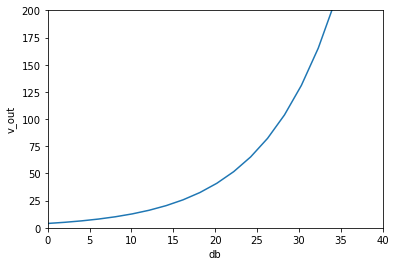

In [2]:
import numpy as np
import matplotlib.pyplot as plt

db = np.linspace(0, 200, 100)

v_in = 4
v_out = v_in*10**(db/20)
plt.plot(db, v_out)
plt.xlabel('db')
plt.ylabel('v_out')
plt.ylim(0, 200)
plt.xlim(0, 40)
plt.show()

In [3]:
epsion = 29.5
d = 3e-3
l = 40e-3
A = l*d
print(A)

C = epsion*8.85e-12*A/d

print(f"C =  {C/1e-12:.4}, pF")

0.00012
C =  10.44, pF


In [4]:
res_freq = 2*np.pi*24e6

L = 1/(C*res_freq**2)
print(f"L = {L/1e-6:.4}, uH")

L = 4.211, uH


In [5]:
ind_reactance = 2*np.pi*24e6*L
cap_reactance = 1/(2*np.pi*24e6*C)
print(f"Inductive reactance = {ind_reactance:.4}, Ohms")
print(f"Capacitive reactance = {cap_reactance:.4}, Ohms")

Inductive reactance = 635.0, Ohms
Capacitive reactance = 635.0, Ohms


In [6]:
res_freq = 2*np.pi*24e6
L = 10.1e-6
C = 4.3e-12
w = 1/np.sqrt(L*C)
print(f"w = {w/(2*np.pi*1e6):.4}, MHz")

w = 24.15, MHz


0.03 0.0032

 3.3e-11 2.183
V_pi = 188.3, V
V_m = 233.7, V


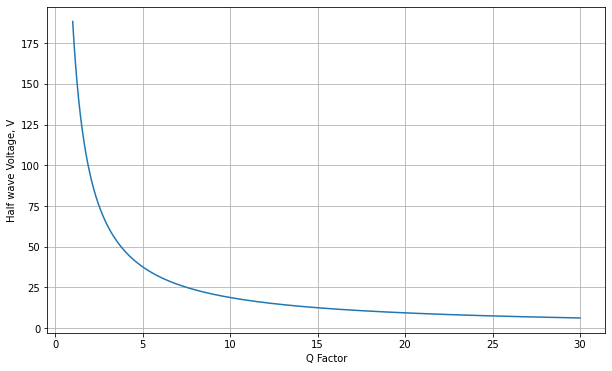

In [7]:
wavelength = 606e-9
n_0 = 2.183
r = 33e-12
d =  3.2e-3
l = 30e-3

V_pi = (wavelength * d) / (n_0**3*r*l)
print(l, d, r, n_0)
print(f"V_pi = {V_pi:.4}, V")

modulation_depth = 3.9
V_m = V_pi * modulation_depth/np.pi
print(f"V_m = {V_m:.4}, V")


Q_factor = np.linspace(1,30,1000)
plt.figure(figsize=(10,6))
plt.plot(Q_factor,V_pi/Q_factor)
plt.xlabel("Q Factor")
plt.ylabel("Half wave Voltage, V")
plt.grid(True)


Text(0, 0.5, 'Inductance, uH')

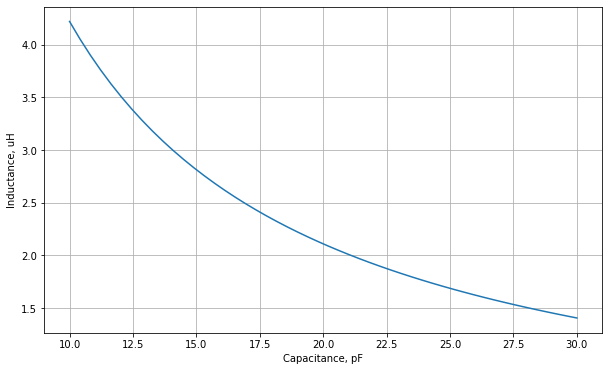

In [14]:
w  = 24.5e6
c = np.linspace(10e-12,30e-12)
l = 1/(((2*np.pi)**2)*w**2*c)

plt.figure(figsize=(10,6))  
plt.plot(c/1e-12,l/1e-6)
plt.grid(True)
plt.xlabel("Capacitance, pF")
plt.ylabel("Inductance, uH")


2.23606797749979


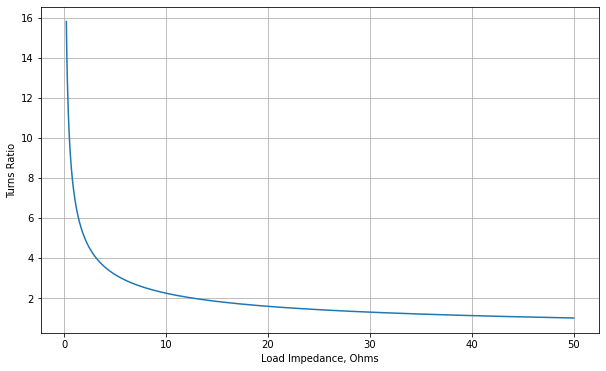

In [28]:
Z_0 = 50
Z_1 = np.linspace(0.2,50,1000)
turn_ratio = np.sqrt(Z_0/Z_1)
plt.figure(figsize=(10,6))
plt.plot(Z_1,turn_ratio)
plt.grid(True)
plt.xlabel("Load Impedance, Ohms")
plt.ylabel("Turns Ratio")

print(np.sqrt(50/10))